Dokładność modelu: 0.6456255343402679

Raport klasyfikacji:
               precision    recall  f1-score   support

           0       0.58      0.53      0.56       585
           1       0.62      0.69      0.65       585
           2       0.60      0.62      0.61       585
           3       0.52      0.41      0.46       585
           4       0.98      1.00      0.99       585
           5       0.57      0.82      0.67       585
           6       0.71      0.53      0.61       585
           7       0.75      0.76      0.76       585
           8       0.51      0.66      0.57       585
           9       0.69      0.48      0.57       584
          10       0.70      0.74      0.72       584
          11       0.58      0.49      0.53       585

    accuracy                           0.65      7018
   macro avg       0.65      0.65      0.64      7018
weighted avg       0.65      0.65      0.64      7018

TOP 3 najbardziej prawdopodobne pozycje:

RM: 28.57%
LM: 17.55%
RB: 14.1

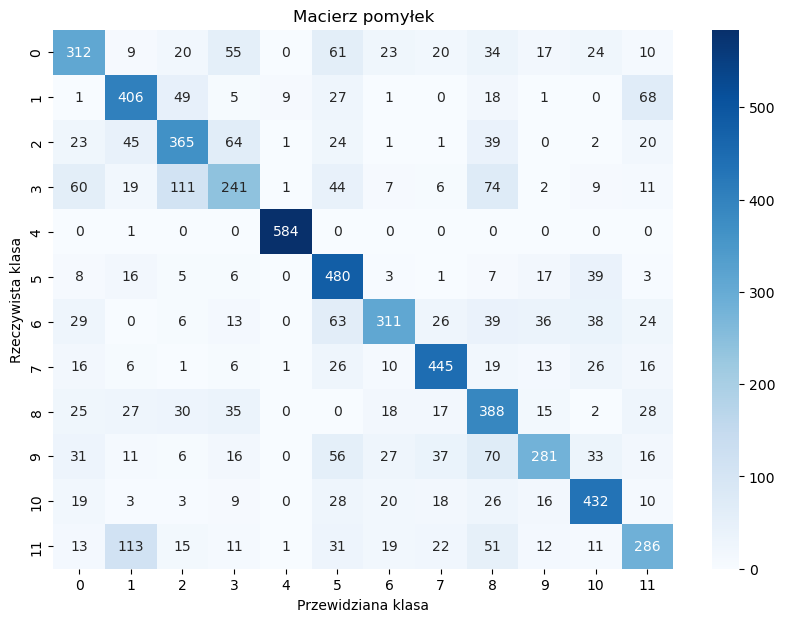

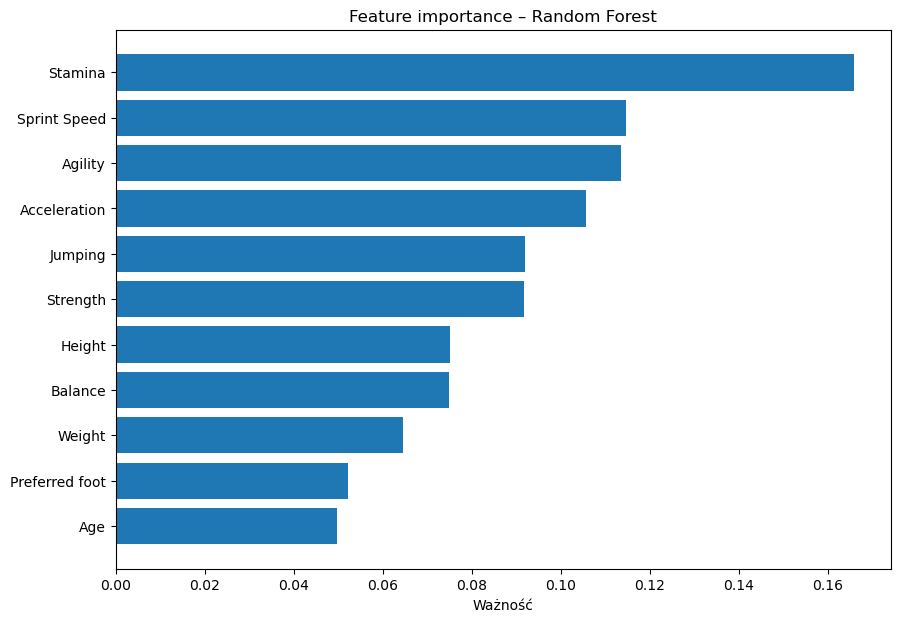

In [2]:
#Random Forrest Classifier (drzewo decyzyjne)

import pandas as pd
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import joblib

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from imblearn.over_sampling import SMOTE


# WCZYTANIE DANYCH
df = pd.read_csv("male.csv")

# KODOWANIE KOLUMN TEKSTOWYCH
df['Preferred foot'] = df['Preferred foot'].map({'Left': 0, 'Right': 1})

position_encoder = LabelEncoder()
df['Position'] = position_encoder.fit_transform(df['Position'])

# CZYSZCZENIE WZROSTU I WAGI 
df['Height'] = df['Height'].astype(str).str[:3].astype(float)
df['Weight'] = df['Weight'].astype(str).str[:2].astype(float)

# WEJŚCIA I WYJŚCIA
input_cols = [
    'Acceleration', 'Sprint Speed', 'Agility', 'Balance', 'Jumping', 'Stamina', 
    'Strength', 'Preferred foot', 'Height', 'Weight', 'Age'
]
output_col = 'Position'

X = df[input_cols]
y = df[output_col]

# SMOTE (był potrzebny ponieważ niektóre pozycje były niedoreprezentowane przez co nie wychodziły w predykcjach)
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X, y)

#  PODZIAŁ NA ZBIORY 
X_train, X_test, y_train, y_test = train_test_split(
    X_res, y_res, test_size=0.2, random_state=42, stratify=y_res
)

#  TWORZENIE I UCZENIE MODELU 
model = RandomForestClassifier(n_estimators=300, max_depth=13, random_state=42)
model.fit(X_train, y_train)
joblib.dump(model, "rf_model.pkl")
joblib.dump(position_encoder, "encoder.pkl")

#  EWALUACJA 
y_pred = model.predict(X_test)

print("Dokładność modelu:", accuracy_score(y_test, y_pred))
print("\nRaport klasyfikacji:\n", classification_report(y_test, y_pred, zero_division=0))


#  PRZYKŁADOWA PREDYKCJA (TOP 3) 

new_player = pd.DataFrame([{
    'Acceleration': 90, 'Sprint Speed': 90, 'Agility': 85, 'Balance': 35, 
    'Jumping': 70, 'Stamina': 90, 'Strength': 45, 'Preferred foot': 1, 
    'Height': 178, 'Weight': 60, 'Age': 23
}])

# przewidywanie prawdopodobieństw
probs = model.predict_proba(new_player)[0]

# sortowanie od największego do najmniejszego
top3_idx = probs.argsort()[-3:][::-1]   

print("TOP 3 najbardziej prawdopodobne pozycje:\n")

for idx in top3_idx:
    position_name = position_encoder.inverse_transform([idx])[0]
    percentage = probs[idx] * 100
    print(f"{position_name}: {percentage:.2f}%")

# mapa kodów = pozycji
mapping = {i: label for i, label in enumerate(position_encoder.classes_)}
mapping

# macierz pomyłek
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Macierz pomyłek")
plt.xlabel("Przewidziana klasa")
plt.ylabel("Rzeczywista klasa")
plt.show()

importances = model.feature_importances_
feature_names = X.columns

# sortowanie
idx = np.argsort(importances)

plt.figure(figsize=(10, 7))
plt.barh(feature_names[idx], importances[idx])
plt.title("Feature importance – Random Forest")
plt.xlabel("Ważność")
plt.show()

# kod do optymalizacj RFC
# param_grid = {
#     'n_estimators': [350, 300, 250],
#     'max_depth': [13, 14, 15,],
#     'min_samples_split': [2, 3, 4],
#     'min_samples_leaf': [1, 2, 3]
# }

# rf = RandomForestClassifier(random_state=42)

# grid = GridSearchCV(
#     rf,
#     param_grid,
#     cv=3,
#     scoring='accuracy',
#     n_jobs=-1,
#     verbose=2
# )

# grid.fit(X_train, y_train)

# print("Najlepsze parametry:")
# print(grid.best_params_)

# print("\nNajlepsza dokładność CV:", grid.best_score_)

# # Trenujemy najlepszy model
# best_model = grid.best_estimator_
# best_model.fit(X_train, y_train)

# # Test na zbiorze testowym
# y_pred = best_model.predict(X_test)

# print("\nDokładność na teście:", accuracy_score(y_test, y_pred))
# print("\nRaport klasyfikacji:\n", classification_report(y_test, y_pred, zero_division=0))




Dokładność modelu: 0.5119692220005699

Raport klasyfikacji:
               precision    recall  f1-score   support

           0       0.39      0.41      0.40       585
           1       0.60      0.64      0.62       585
           2       0.49      0.53      0.51       585
           3       0.41      0.29      0.34       585
           4       0.99      0.99      0.99       585
           5       0.54      0.65      0.59       585
           6       0.35      0.30      0.32       585
           7       0.50      0.49      0.50       585
           8       0.44      0.49      0.46       585
           9       0.32      0.33      0.32       584
          10       0.58      0.61      0.60       584
          11       0.48      0.43      0.45       585

    accuracy                           0.51      7018
   macro avg       0.51      0.51      0.51      7018
weighted avg       0.51      0.51      0.51      7018


Przewidywana pozycja: CAM


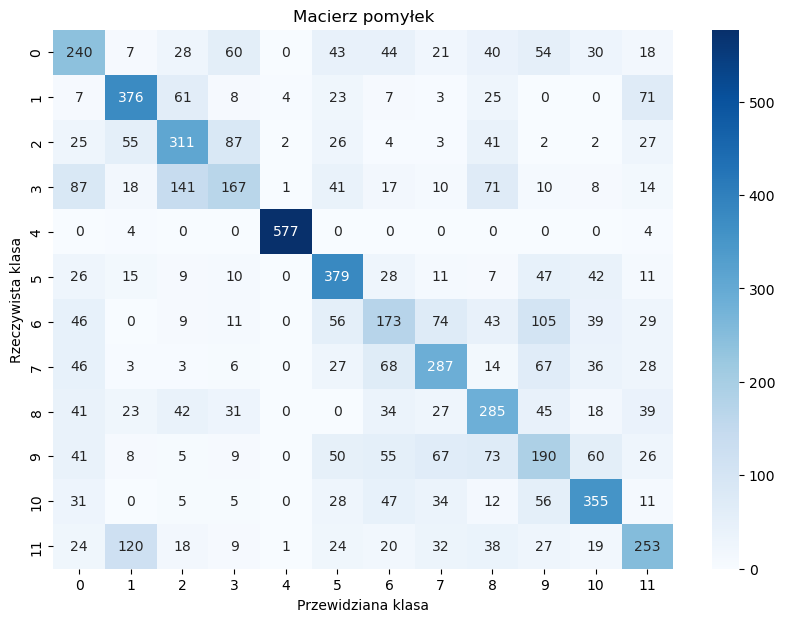

In [12]:
# MLP Classifier (płytka sieć neuronowa - 2 warstwy ukryte)

import pandas as pd
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, classification_report
from sklearn.neural_network import MLPClassifier
from imblearn.over_sampling import SMOTE

# WCZYTANIE DANYCH
df = pd.read_csv("male.csv")

# KODOWANIE 
df['Preferred foot'] = df['Preferred foot'].map({'Left': 0, 'Right': 1})

position_encoder = LabelEncoder()
df['Position'] = position_encoder.fit_transform(df['Position'])

df['Height'] = df['Height'].astype(str).str[:3].astype(float)
df['Weight'] = df['Weight'].astype(str).str[:2].astype(float)

#  WEJŚCIA / WYJŚCIA 
input_cols = [
    'Acceleration', 'Sprint Speed', 'Agility', 'Balance', 'Jumping', 'Stamina', 
    'Strength', 'Preferred foot', 'Height', 'Weight', 'Age'
]
output_col = 'Position'

X = df[input_cols]
y = df[output_col]

#  SMOTE 
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X, y)

#  PODZIAŁ
X_train, X_test, y_train, y_test = train_test_split(
    X_res, y_res, test_size=0.2, random_state=42, stratify=y_res
)

# SKALOWANIE
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#  SIEĆ NEURONOWA 
model = MLPClassifier(
    hidden_layer_sizes=(64, 32),
    activation='relu',
    solver='adam',
    max_iter=1200,
    early_stopping=True,
    n_iter_no_change=20,
    tol=1e-3,
    random_state=42
)


model.fit(X_train, y_train)

#  EWALUACJA 
y_pred = model.predict(X_test)

print("Dokładność modelu:", accuracy_score(y_test, y_pred))
print("\nRaport klasyfikacji:\n", classification_report(y_test, y_pred, zero_division=0))

#  PRZYKŁADOWA PREDYKCJA 
new_player = pd.DataFrame([{
    'Acceleration': 70, 'Sprint Speed': 65, 'Agility': 75, 'Balance': 75, 
    'Jumping': 60, 'Stamina': 40, 'Strength': 75, 'Preferred foot': 1, 
    'Height': 175, 'Weight': 62, 'Age': 23
}])

new_player_scaled = scaler.transform(new_player)

pred = model.predict(new_player_scaled)
print("\nPrzewidywana pozycja:", position_encoder.inverse_transform(pred)[0])

# macierz pomyłek
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Macierz pomyłek")
plt.xlabel("Przewidziana klasa")
plt.ylabel("Rzeczywista klasa")
plt.show()

Epoch 1/200


D:\Users\Bartek\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


702/702 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.3576 - loss: 1.7480 - val_accuracy: 0.4250 - val_loss: 1.5428
Epoch 2/200
702/702 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4150 - loss: 1.5927 - val_accuracy: 0.4380 - val_loss: 1.5250
Epoch 3/200
702/702 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4264 - loss: 1.5695 - val_accuracy: 0.4382 - val_loss: 1.5066
Epoch 4/200
702/702 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4269 - loss: 1.5497 - val_accuracy: 0.4441 - val_loss: 1.4965
Epoch 5/200
702/702 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4309 - loss: 1.5410 - val_accuracy: 0.4473 - val_loss: 1.4956
Epoch 6/200
702/702 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4360 - loss: 1.5353 - val_accuracy: 0.4480 - val_loss: 1.4884
Epoch 7/200
702/702 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4406 - loss: 1.5202 - val_accuracy: 0.4480 - val_loss: 1.4857
Epoch 8/200
702/702 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4436 - loss: 1.5128 - val_accuracy: 0.4549

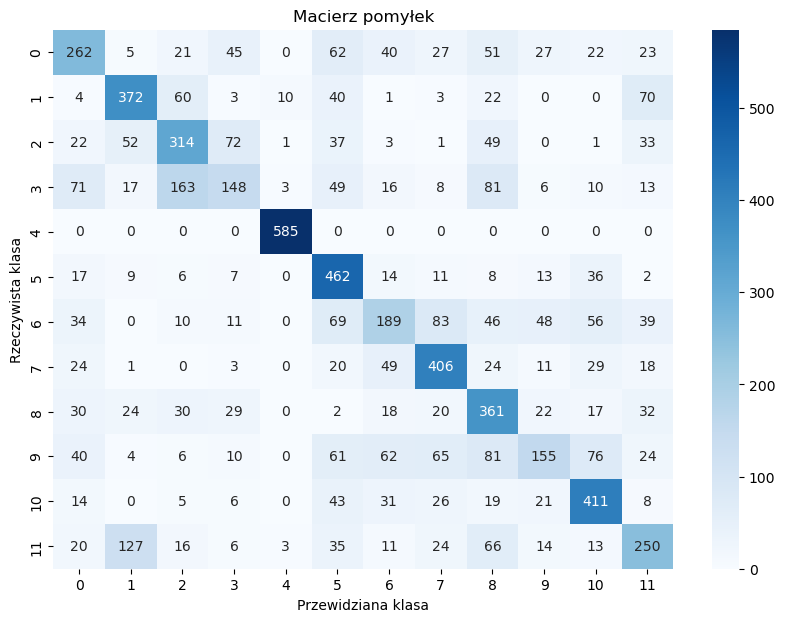

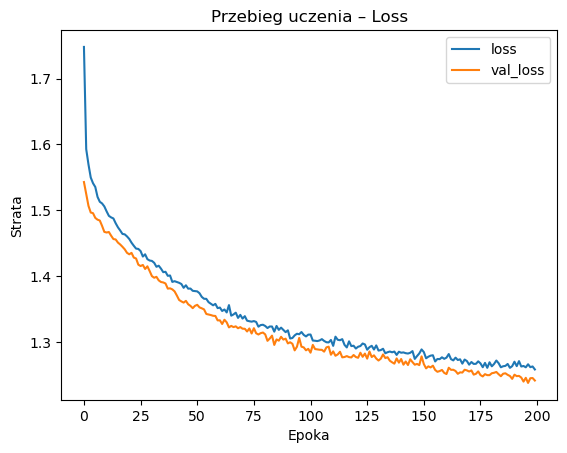

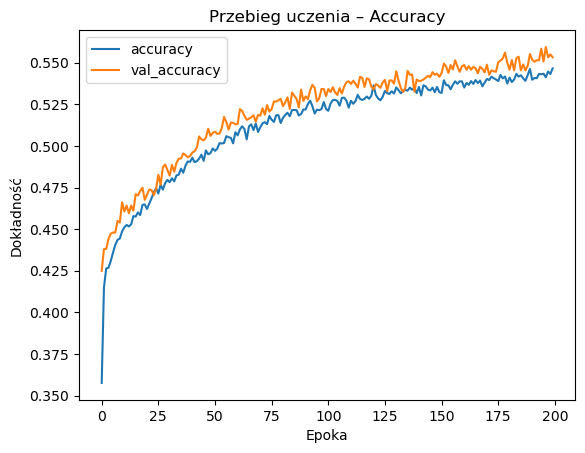

In [10]:
# TensorFlow - głeboka sieć neuronowa (3 warstwy ukryte)
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

from imblearn.over_sampling import SMOTE


# WCZYTANIE DANYCH
df = pd.read_csv("male.csv")


# KODOWANIE 
df['Preferred foot'] = df['Preferred foot'].map({'Left': 0, 'Right': 1})

position_encoder = LabelEncoder()
df['Position'] = position_encoder.fit_transform(df['Position'])

df['Height'] = df['Height'].astype(str).str[:3].astype(float)
df['Weight'] = df['Weight'].astype(str).str[:2].astype(float)


# WEJŚCIA I WYJŚCIA 
input_cols = [
    'Acceleration', 'Sprint Speed', 'Agility', 'Balance', 'Jumping', 'Stamina',
    'Strength', 'Preferred foot', 'Height', 'Weight', 'Age'
]
output_col = 'Position'

X = df[input_cols]
y = df[output_col]


#  SMOTE 
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X, y)


# PODZIAŁ
X_train, X_test, y_train, y_test = train_test_split(
    X_res, y_res, test_size=0.2, random_state=42, stratify=y_res
)


#  SKALOWANIE 
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


# ARCHITEKTURA SIECI
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.2),

    Dense(64, activation='relu'),
    Dropout(0.2),

    Dense(32, activation='relu'),

    Dense(len(np.unique(y_res)), activation='softmax')  # liczba klas
])


#  KOMPILACJA 
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)


#  EARLY STOPPING 
early_stop = EarlyStopping(
    monitor='val_loss',
    patience=20,
    restore_best_weights=True
)


#  TRENING 
history = model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=200,
    batch_size=32,
    callbacks=[early_stop],
    verbose=1
)


# EWALUACJA
y_pred = model.predict(X_test).argmax(axis=1)
print("Dokładność:", accuracy_score(y_test, y_pred))
print("\nRaport klasyfikacji:\n", classification_report(y_test, y_pred, zero_division=0))


#  PRZYKŁADOWA PREDYKCJA 
new_player = pd.DataFrame([{
    'Acceleration': 70, 'Sprint Speed': 65, 'Agility': 75, 'Balance': 75,
    'Jumping': 60, 'Stamina': 40, 'Strength': 75, 'Preferred foot': 1,
    'Height': 175, 'Weight': 62, 'Age': 23
}])

new_player_scaled = scaler.transform(new_player)

pred_class = model.predict(new_player_scaled).argmax(axis=1)
print("\nPrzewidywana pozycja:", position_encoder.inverse_transform(pred_class)[0])

# macierz pomyłek
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Macierz pomyłek")
plt.xlabel("Przewidziana klasa")
plt.ylabel("Rzeczywista klasa")
plt.show()

# WYKRES LOSS 
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.title("Przebieg uczenia – Loss")
plt.xlabel("Epoka")
plt.ylabel("Strata")
plt.legend()
plt.show()

#  WYKRES ACCURACY
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.title("Przebieg uczenia – Accuracy")
plt.xlabel("Epoka")
plt.ylabel("Dokładność")
plt.legend()
plt.show()


In [14]:
%%writefile app.py
print("Streamlit app!")

Writing app.py
